# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from PIL import Image 
import pydicom as dicom



from scipy.fft import fft, fftfreq
import itertools
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import auc
from tkinter.filedialog import askdirectory
import tkinter as tk

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

import os
import csv
import pandas as pd

import pydicom as dicom

import imageio
import scipy

# Extract Masks

In [11]:
patM = 'C:/IBECPostDocDrive/2023_07_25_ScaffoldDiffusionMRIProcessing/NewExperimetns/Diffusion4WellChip_Try4'

MS = scipy.ndimage.label(np.asarray(Image.open(patM+'/MaskPre.png'))/255)[0]
ME = scipy.ndimage.label(np.asarray(Image.open(patM+'/MaskPost.png'))/255)[0]
MB = np.asarray(Image.open(patM+'/MaskBack.png'))/255


# Extract Images

In [12]:
list(range(999,1189+1)[0:-1:10])

[999,
 1009,
 1019,
 1029,
 1039,
 1049,
 1059,
 1069,
 1079,
 1089,
 1099,
 1109,
 1119,
 1129,
 1139,
 1149,
 1159,
 1169,
 1179]

In [43]:
# ds=np.empty(len(range(693,993+1)[0:-1:10]), dtype=object)
# for x, i in enumerate(range(693,993+1)[0:-1:10]):
#     ds[x] = imageio.v2.imread(patM+'/'+str(i)+'/pdata/1/dicom/4wellchip_4wellchip_MAR_4wellchip_sc_E'+str(i)+'_P1_Im1.dcm')



ds=np.empty(1189-999+1, dtype=object)
for x, i in enumerate(range(999,1189+1)):
    ds[x] = imageio.v2.imread(patM+'/'+str(i)+'/pdata/1/dicom/4wellchip_4wellchip_MAR_4wellchip_sc_E'+str(i)+'_P1_Im1.dcm')


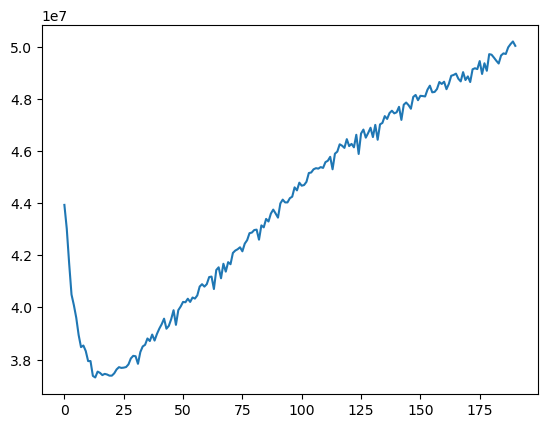

In [44]:
plt.plot([np.sum(ds[x]) for x in range(len(ds))])

In [45]:
for i in range(len(ds)):
    if np.sum(ds[i]) != np.sum(ds[0]):
        diff = np.sum(ds[i])-np.sum(ds[0])
        nf = diff/(np.shape(ds[0])[0]*np.shape(ds[0])[1])
        ds[i] = ds[i]-nf

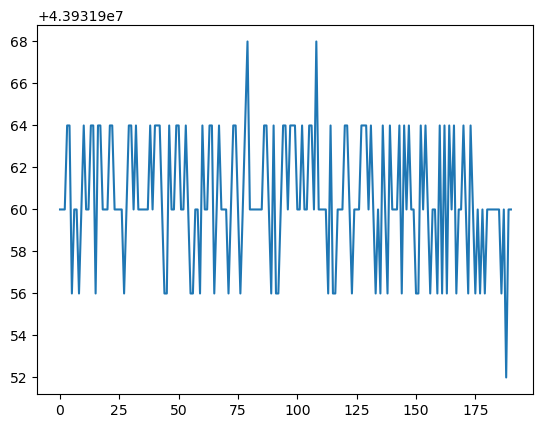

In [46]:
plt.plot([np.sum(ds[x]) for x in range(len(ds))])

# Extract Data

In [47]:
ds[-1]

Array([[-150.92361   , -108.08981   , -113.03217   , ...,   99.76401   ,
         100.58774   ,  -11.164581  ],
       [  -8.967987  ,  -77.61191   ,   91.52673   , ...,  167.5842    ,
         204.92648   ,   78.072525  ],
       [ -76.78818   ,   49.79123   ,  -43.839096  , ...,  -70.198364  ,
         219.479     ,  112.943634  ],
       ...,
       [  -4.84935   ,   -7.8696747 ,    0.91674805, ...,  -33.405212  ,
          10.526901  ,    6.1336823 ],
       [ -25.991669  ,   59.67595   ,   19.313324  , ...,  148.36389   ,
         235.12982   ,  142.32324   ],
       [-103.147446  ,  -84.20172   ,  -73.49327   , ...,    6.1336823 ,
         104.43179   ,  -48.50688   ]], dtype=float32)

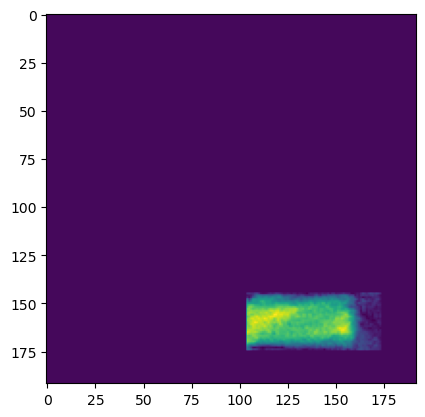

In [48]:

plt.imshow(ds[-1]*ME*(ME==4))

In [75]:
# len(range(693,993+1)[0:-1:10])

30

In [76]:
# datt = np.empty((len(range(693,993+1)[0:-1:10]),2,4), dtype=object)
# dattS = np.empty((len(range(693,993+1)[0:-1:10]),2,4), dtype=object)

# h = 1 # Well
# k = 0 # Frame

# for h in range(1,5):
#     for k in range(len(range(693,993+1)[0:-1:10])):

#         MSW = MS*(MS==h)
#         MEW = ME*(ME==h)

#         rawS = [(ds[k]*MSW)[j,l] for j in range(np.shape(MSW)[0]) for l in range(np.shape(MSW)[1]) if (ds[k]*MSW)[j,l] != 0]
#         rawE = [(ds[k]*MEW)[j,l] for j in range(np.shape(MEW)[0]) for l in range(np.shape(MEW)[1]) if (ds[k]*MEW)[j,l] != 0]
#         backG = [(ds[k]*MB)[j,l] for j in range(np.shape(MB)[0]) for l in range(np.shape(MB)[1]) if (ds[k]*MB)[j,l] != 0]

#         datt[k,0,h-1] = np.mean(rawE-np.mean(backG))
#         datt[k,1,h-1] = np.std(rawE-np.mean(backG))

#         dattS[k,0,h-1] = np.mean(rawS-np.mean(backG))
#         dattS[k,1,h-1] = np.std(rawS-np.mean(backG))


In [27]:
# np.save(patM+'/AllDatWell.npy', datt, allow_pickle=True)
# np.save(patM+'/AllDatScaff.npy', dattS, allow_pickle=True)

In [29]:
# datt2 = np.load(patM+'/AllDatWell.npy', allow_pickle=True)
# dattS2 = np.load(patM+'/AllDatScaff.npy', allow_pickle=True)

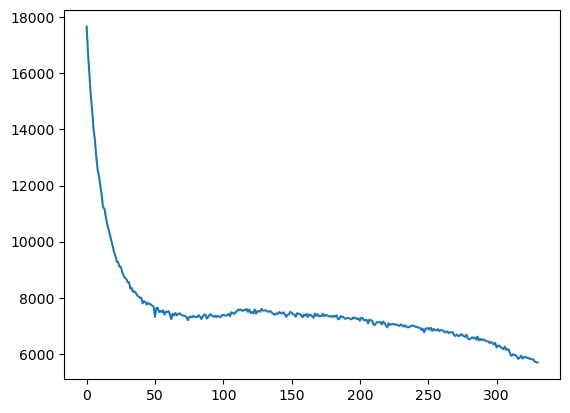

In [30]:
# plt.figure()

# plt.plot(dattS2[::,0,1])

# plt.show()

In [32]:
# tp = list(range(0,676-346+1))

In [77]:

# plt.figure(dpi=140)

# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,0], yerr=dattS2[::,1,0], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,1], yerr=dattS2[::,1,1], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,2], yerr=dattS2[::,1,2], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,3], yerr=dattS2[::,1,3], fmt='-o', label='Scaffold', color='#e675cfff')


# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,0], yerr=datt2[::,1,0], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,1], yerr=datt2[::,1,1], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,2], yerr=datt2[::,1,2], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,3], yerr=datt2[::,1,3], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

# plt.xlabel('time (min)')
# plt.ylabel('Pixel intensity (A.U.)')

# plt.legend()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# # plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip1.svg')

# plt.show()

In [78]:

# plt.figure(dpi=140)

# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,0], yerr=dattS2[::,1,0], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,1], yerr=dattS2[::,1,1], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,2], yerr=dattS2[::,1,2], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,3], yerr=dattS2[::,1,3], fmt='-o', label='Scaffold', color='#e675cfff')


# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,0], yerr=datt2[::,1,0], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,1], yerr=datt2[::,1,1], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,2], yerr=datt2[::,1,2], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,3], yerr=datt2[::,1,3], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

# plt.xlabel('time (min)')
# plt.ylabel('Pixel intensity (A.U.)')

# plt.legend()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip2.svg')

# plt.show()

In [79]:

# plt.figure(dpi=140)

# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,0], yerr=dattS2[::,1,0], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,1], yerr=dattS2[::,1,1], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,2], yerr=dattS2[::,1,2], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,3], yerr=dattS2[::,1,3], fmt='-o', label='Scaffold', color='#e675cfff')


# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,0], yerr=datt2[::,1,0], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,1], yerr=datt2[::,1,1], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,2], yerr=datt2[::,1,2], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,3], yerr=datt2[::,1,3], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

# plt.xlabel('time (min)')
# plt.ylabel('Pixel intensity (A.U.)')

# plt.legend()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip3.svg')

# plt.show()

In [80]:

# plt.figure(dpi=140)

# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,0], yerr=dattS2[::,1,0], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,1], yerr=dattS2[::,1,1], fmt='-o', label='Scaffold', color='#e675cfff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,2], yerr=dattS2[::,1,2], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], dattS2[::,0,3], yerr=dattS2[::,1,3], fmt='-o', label='Scaffold', color='#e675cfff')


# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,0], yerr=datt2[::,1,0], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,1], yerr=datt2[::,1,1], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# # plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,2], yerr=datt2[::,1,2], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))], datt2[::,0,3], yerr=datt2[::,1,3], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

# plt.xlabel('time (min)')
# plt.ylabel('Pixel intensity (A.U.)')

# plt.legend()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip4.svg')

# plt.show()

In [81]:
# ScaffDat['Frame300Well4']

In [49]:
ScaffDat = dict()
WellDat = dict()
BackDat = dict()

In [24]:
# k=0
# h=4

# [(ds[k]*MEW)[j,l] for j in range(np.shape(MEW)[0]) for l in range(np.shape(MEW)[1]) if (ds[k]*MEW)[j,l] != 0]

In [50]:

for k in range(1189-999+1):
    for h in range(1,5):
        MSW = MS*(MS==h)
        MEW = ME*(ME==h)

        ScaffDat['Frame'+str(k)+'Well'+str(h)] = [(ds[k]*MSW)[j,l] for j in range(np.shape(MSW)[0]) for l in range(np.shape(MSW)[1]) if (ds[k]*MSW)[j,l] != 0]
        WellDat['Frame'+str(k)+'Well'+str(h)] = [(ds[k]*MEW)[j,l] for j in range(np.shape(MEW)[0]) for l in range(np.shape(MEW)[1]) if (ds[k]*MEW)[j,l] != 0]

    BackDat['Frame'+str(k)] = [(ds[k]*MB)[j,l] for j in range(np.shape(MB)[0]) for l in range(np.shape(MB)[1]) if (ds[k]*MB)[j,l] != 0]


df = pd.DataFrame.from_dict(ScaffDat)
df.to_csv(patM+'/AllDatScaffold.csv', index=False)    

df = pd.DataFrame.from_dict(WellDat)
df.to_csv(patM+'/AllDatWell.csv', index=False)    

df = pd.DataFrame.from_dict(BackDat)
df.to_csv(patM+'/AllDatBackground.csv', index=False)    
        


In [26]:
# WellDat['Frame'+str(k)+'Well'+str(i+1)] 

In [51]:
np.shape(WellDat['Frame'+str(2)+'Well'+str(2+1)])

(2100,)

In [97]:
# for i in range(4):
#     for k in range(676-346+1):
#         print(np.shape(WellDat['Frame'+str(2)+'Well'+str(i+1)])[0] == 1037)
#         if np.shape(WellDat['Frame'+str(2)+'Well'+str(i+1)])[0] != 1037:
#             print(np.shape(WellDat['Frame'+str(2)+'Well'+str(i+1)]))
#             # WellDat['Frame'+str(k)+'Well'+str(i+1)] = np.concatenate((WellDat['Frame'+str(k)+'Well'+str(i+1)], np.zeros(34)*np.nan))
#         if np.shape(WellDat['Frame'+str(2)+'Well'+str(i+1)])[0] != 1037:
#             print(np.shape(WellDat['Frame'+str(2)+'Well'+str(i+1)]))
#             # WellDat['Frame'+str(k)+'Well'+str(i+1)] = WellDat['Frame'+str(k)+'Well'+str(i+1)][0:1037]

In [37]:
# df = pd.DataFrame.from_dict(ScaffDat)
# df.to_csv(patM+'/AllDatScaffold.csv', index=False)    

# df = pd.DataFrame.from_dict(WellDat)
# df.to_csv(patM+'/AllDatWell.csv', index=False)    

df = pd.DataFrame.from_dict(BackDat)
df.to_csv(patM+'/AllDatBackground.csv', index=False)    

In [11]:
df2 = pd.read_csv(patM+'/AllDatScaffold.csv')
ScaffDat=df2.to_dict(orient='list')

df2 = pd.read_csv(patM+'/AllDatWell.csv')
WellDat=df2.to_dict(orient='list')

df2 = pd.read_csv(patM+'/AllDatBackground.csv')
BackDat=df2.to_dict(orient='list')

In [52]:
# k=0

mm3 = [np.mean(BackDat['Frame'+str(k)])+2*np.std(BackDat['Frame'+str(k)]) for k in range(1189-999+1)]

# mm3 = np.zeros(993-693+1)
# mm3 = [np.max(BackDat['Frame'+str(k)]) for k in range(993-693+1)]


wda = [WellDat['Frame'+str(k)+'Well1']-mm3[k] for k in range(1189-999+1)]
sda = [ScaffDat['Frame'+str(k)+'Well1']-mm3[k] for k in range(1189-999+1)]
wdb = [WellDat['Frame'+str(k)+'Well2']-mm3[k] for k in range(1189-999+1)]
sdb = [ScaffDat['Frame'+str(k)+'Well2']-mm3[k] for k in range(1189-999+1)]
wdc = [WellDat['Frame'+str(k)+'Well3']-mm3[k] for k in range(1189-999+1)]
sdc = [ScaffDat['Frame'+str(k)+'Well3']-mm3[k] for k in range(1189-999+1)]
wdd = [WellDat['Frame'+str(k)+'Well4']-mm3[k] for k in range(1189-999+1)]
sdd = [ScaffDat['Frame'+str(k)+'Well4']-mm3[k] for k in range(1189-999+1)]

# ki = [np.sum(ds[m]) for m in range(993-693+1)]

mm2a = [np.mean(sda[k][sda[k]>=0]) for k in range(1189-999+1)]
mm1a = [np.mean(wda[k][wda[k]>=0]) for k in range(1189-999+1)]
mm2b = [np.mean(sdb[k][sdb[k]>=0]) for k in range(1189-999+1)]
mm1b = [np.mean(wdb[k][wdb[k]>=0]) for k in range(1189-999+1)]
mm2c = [np.mean(sdc[k][sdc[k]>=0]) for k in range(1189-999+1)]
mm1c = [np.mean(wdc[k][wdc[k]>=0]) for k in range(1189-999+1)]
mm2d = [np.mean(sdd[k][sdd[k]>=0]) for k in range(1189-999+1)]
mm1d = [np.mean(wdd[k][wdd[k]>=0]) for k in range(1189-999+1)]

mm2sa = [np.std(sda[k][sda[k]>=0]) for k in range(1189-999+1)]
mm1sa = [np.std(wda[k][wda[k]>=0]) for k in range(1189-999+1)]
mm2sb = [np.std(sdb[k][sdb[k]>=0]) for k in range(1189-999+1)]
mm1sb = [np.std(wdb[k][wdb[k]>=0]) for k in range(1189-999+1)]
mm2sc = [np.std(sdc[k][sdc[k]>=0]) for k in range(1189-999+1)]
mm1sc = [np.std(wdc[k][wdc[k]>=0]) for k in range(1189-999+1)]
mm2sd = [np.std(sdd[k][sdd[k]>=0]) for k in range(1189-999+1)]
mm1sd = [np.std(wdd[k][wdd[k]>=0]) for k in range(1189-999+1)]

In [137]:
len(sda)

301

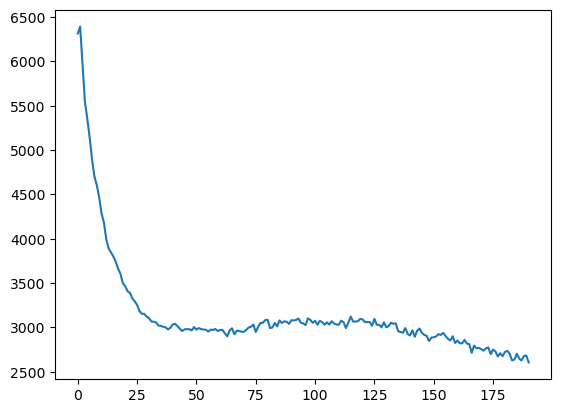

In [53]:
plt.plot(mm2a)

In [56]:
# mm3 = [np.mean(BackDat['Frame'+str(k)])+4*np.mean(BackDat['Frame'+str(k)]) for k in range(309-220+1)]

# mm1 = [np.mean(WellDat['Frame'+str(k)+'Well1']-mm3[k]) for k in range(309-220+1)]
# mm2 = [np.mean(ScaffDat['Frame'+str(k)+'Well1']-mm3[k]) for k in range(309-220+1)]

# mm1s = [np.std(WellDat['Frame'+str(k)+'Well1']-mm3[k]) for k in range(309-220+1)]
# mm2s = [np.std(ScaffDat['Frame'+str(k)+'Well1']-mm3[k]) for k in range(309-220+1)]


In [37]:
plt.hist(sda[k][sda[k]>=0])

IndexError: list index out of range

In [24]:
plt.plot([np.max(BackDat['Frame'+str(k)]) for k in range(993-693+1)])

KeyError: 'Frame191'

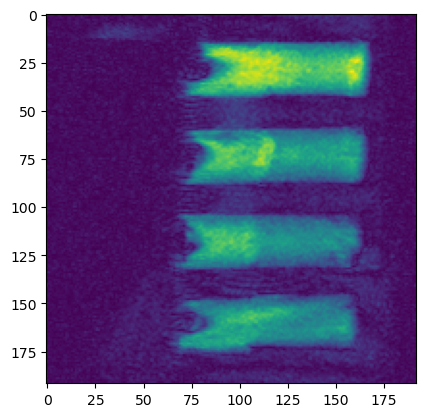

In [25]:
plt.imshow(ds[100])

In [26]:
plt.imshow(ds[300][0::,100::])

IndexError: index 300 is out of bounds for axis 0 with size 191

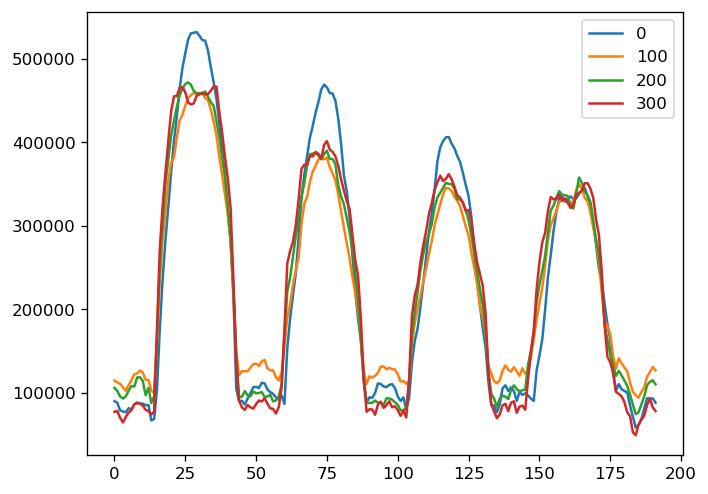

In [54]:
plt.figure(dpi=120)

plt.plot(np.sum(ds[0],1), label = '0')
plt.plot(np.sum(ds[25],1), label = '100')
plt.plot(np.sum(ds[50],1), label = '200')
plt.plot(np.sum(ds[100],1), label = '300')
# plt.plot(np.sum(ds[330],1), label = '330')

plt.legend()

# plt.ylim((130000,300000))

plt.show()

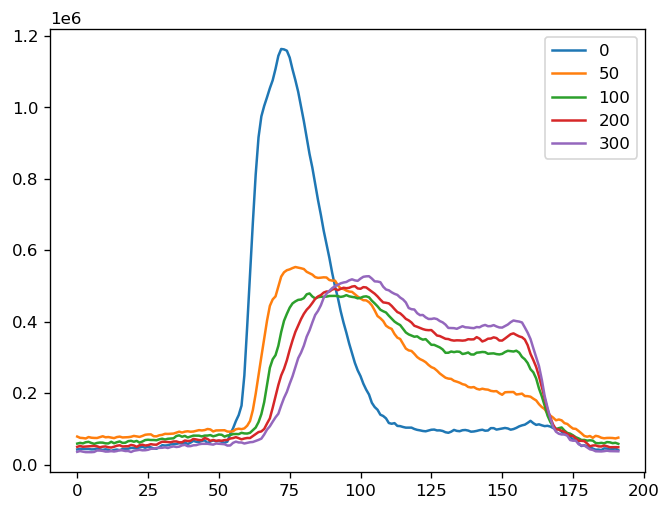

In [55]:
plt.figure(dpi=120)

plt.plot(np.sum(ds[0],0), label = '0')
plt.plot(np.sum(ds[20],0), label = '50')
plt.plot(np.sum(ds[50],0), label = '100')
plt.plot(np.sum(ds[75],0), label = '200')
plt.plot(np.sum(ds[100],0), label = '300')
# plt.plot(np.sum(ds[330],0), label = '330')

plt.legend()

plt.show()

In [111]:
np.mean(ds[k])

IndexError: index 330 is out of bounds for axis 0 with size 301

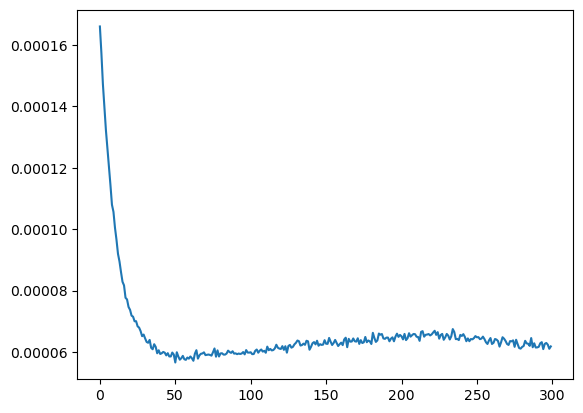

In [44]:
plt.plot([np.mean(sda[k][sda[k]>=0])/np.sum(ds[k]) for k in range(300)])

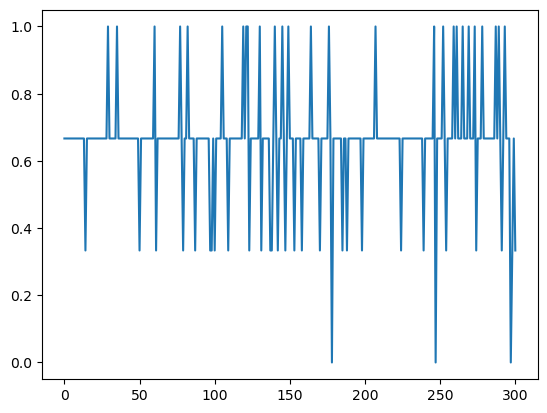

In [45]:
nf = [np.sum(ds[k]) for k in range(993-693+1)]

nfp = 1-(nf-np.min(nf))/(np.max(nf)-np.min(nf))
plt.plot(nfp)

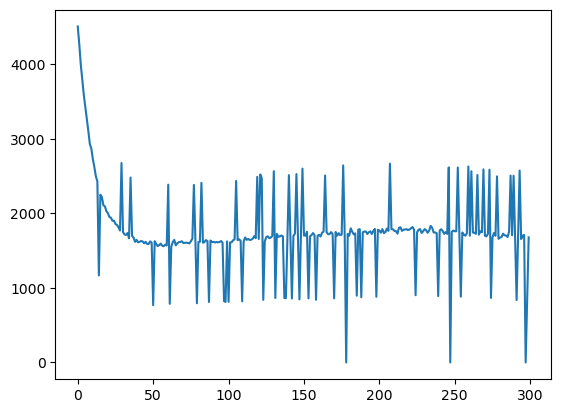

In [46]:
plt.plot([np.mean(sda[k][sda[k]>=0])*nfp[k] for k in range(300)])

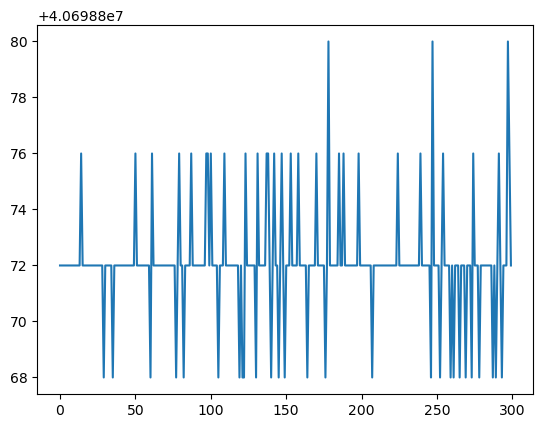

In [47]:
plt.plot([np.sum(ds[k]) for k in range(300)])

In [48]:
np.sum(ds[100])

30417370.0

In [50]:
np.sum(ds[300])

45552000.0

In [51]:
len(mm2a)

301

In [31]:
tp = list(range(0,1189-999+1))

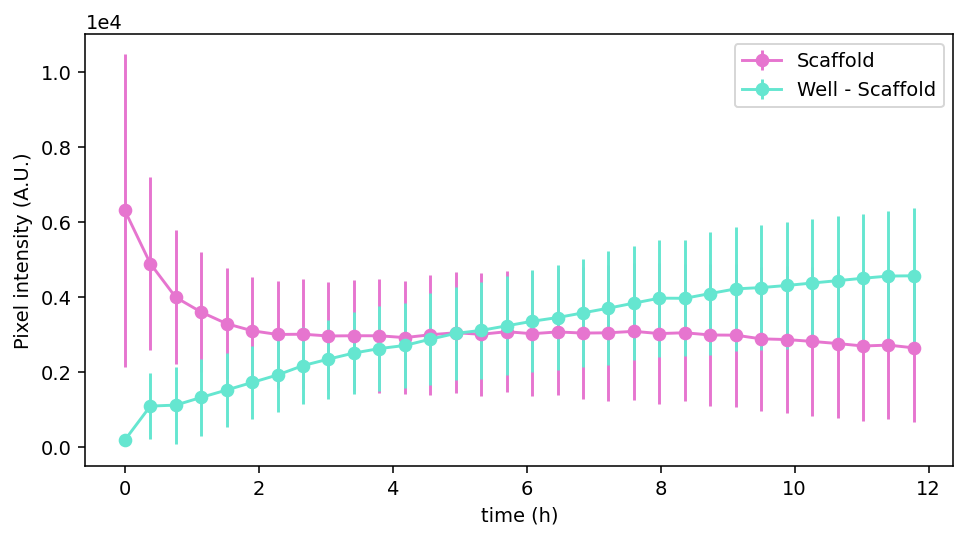

In [56]:

plt.figure(dpi=140, figsize=(8,4))

plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm2a[0:-1:6], yerr=mm2sa[0:-1:6], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2b[0:-1:4], yerr=mm2sb[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2c[0:-1:4], yerr=mm2sc[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2d[0:-1:4], yerr=mm2sd[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')


plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm1a[0:-1:6], yerr=mm1sa[0:-1:6], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1b[0:-1:4], yerr=mm1sb[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1c[0:-1:4], yerr=mm1sc[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1d[0:-1:4], yerr=mm1sd[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

plt.xlabel('time (h)')
plt.ylabel('Pixel intensity (A.U.)')

plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip1b.svg')

plt.show()

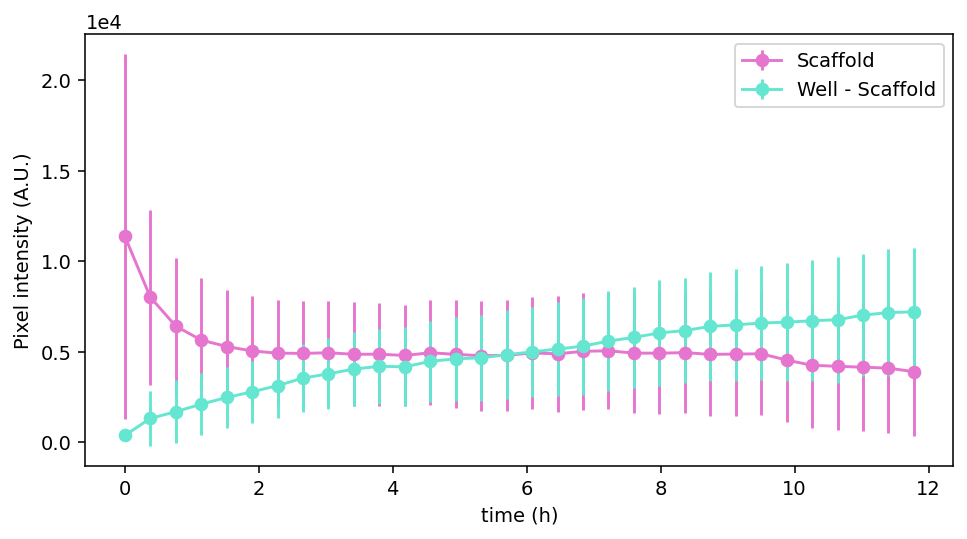

In [57]:

plt.figure(dpi=140, figsize=(8,4))

# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2a[0:-1:4], yerr=mm2sa[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm2b[0:-1:6], yerr=mm2sb[0:-1:6], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2c[0:-1:4], yerr=mm2sc[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2d[0:-1:4], yerr=mm2sd[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')


# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1a[0:-1:4], yerr=mm1sa[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm1b[0:-1:6], yerr=mm1sb[0:-1:6], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1c[0:-1:4], yerr=mm1sc[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1d[0:-1:4], yerr=mm1sd[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

plt.xlabel('time (h)')
plt.ylabel('Pixel intensity (A.U.)')

plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip2b.svg')

plt.show()

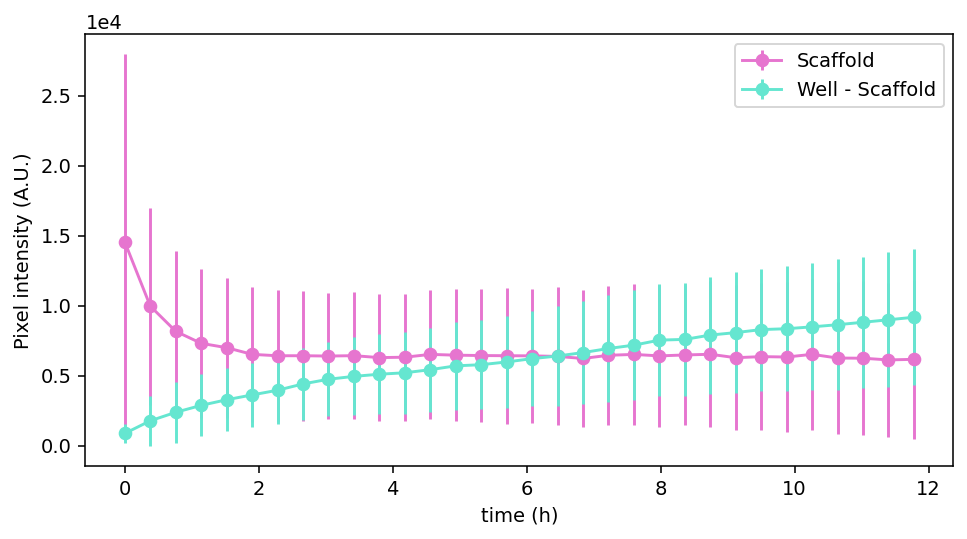

In [58]:

plt.figure(dpi=140, figsize=(8,4))

# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2a[0:-1:4], yerr=mm2sa[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2b[0:-1:4], yerr=mm2sb[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm2c[0:-1:6], yerr=mm2sc[0:-1:6], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2d[0:-1:4], yerr=mm2sd[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')


# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1a[0:-1:4], yerr=mm1sa[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1b[0:-1:4], yerr=mm1sb[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm1c[0:-1:6], yerr=mm1sc[0:-1:6], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1d[0:-1:4], yerr=mm1sd[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

plt.xlabel('time (h)')
plt.ylabel('Pixel intensity (A.U.)')

plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip3b.svg')

plt.show()

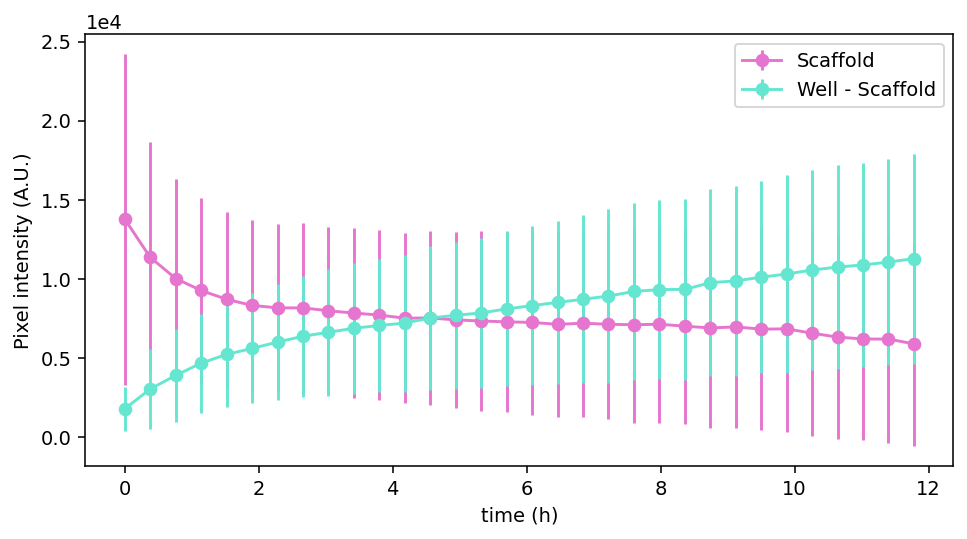

In [59]:

plt.figure(dpi=140, figsize=(8,4))

# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2a[0:-1:4], yerr=mm2sa[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2b[0:-1:4], yerr=mm2sb[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm2c[0:-1:4], yerr=mm2sc[0:-1:4], fmt='-o', label='Scaffold', color='#e675cfff')
plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm2d[0:-1:6], yerr=mm2sd[0:-1:6], fmt='-o', label='Scaffold', color='#e675cfff')


# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1a[0:-1:4], yerr=mm1sa[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1b[0:-1:4], yerr=mm1sb[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
# plt.errorbar([tp[i]*2.55 for i in range(0, len(tp))][0:-1:4], mm1c[0:-1:4], yerr=mm1sc[0:-1:4], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')
plt.errorbar([tp[i]*3.8/60 for i in range(0, len(tp))][0:-1:6], mm1d[0:-1:6], yerr=mm1sd[0:-1:6], fmt='-o', label='Well - Scaffold', color='#65e6d0ff')

plt.xlabel('time (h)')
plt.ylabel('Pixel intensity (A.U.)')

plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# plt.savefig(r'C:\IBECPostDocDrive\2023_09_28_DiffusionPaperStuff\Figures/DatDiffChip4b.svg')

plt.show()